# PHASE 3 : DEVELOPMENT PART-1

***************************************************************************************************************
PROJECT TITLE 9238 - SENTIMENT ANALYSIS FOR MARKETING

NAME - Fathima Sara R

TEAM ID - 5277

TEAM NAME - Proj_204223_Team_1

COLLEGE CODE - NAME : 9238 - MANGAYARKARASI COLLEGE OF ENGINEERING PARAVAI , MADURAI

GROUP : 5

GITHUB REPOSITORY LINK : https://github.com/Sara1173/Ibm-NaanMudhalvan-Ai.git

***************************************************************************************************************

# Abstract :
Sentiment analysis has emerged as a powerful tool in the field of marketing, enabling businesses to gain valuable insights into consumer perceptions and emotions. In today's digital age, where social media and online reviews play a pivotal role in shaping brand reputation, understanding and harnessing sentiment has become essential. This study explores the application of sentiment analysis techniques to analyze consumer sentiment towards products, services, and brands.
We delve into the methodologies, tools, and data sources commonly used in sentiment analysis for marketing purposes. Furthermore, we discuss the challenges and ethical considerations associated with sentiment analysis in this context. Ultimately, this research highlights the significance of sentiment analysis as a strategic tool for marketing professionals, offering the potential to enhance customer engagement, improve brand perception, and drive business growth.

# Proposal :
"In Phase 3 of our project, we initiate development by focusing on loading and preprocessing the sentiment analysis dataset. The process involves loading a CSV dataset, handling missing values, splitting it into training and testing sets, and converting text data into numerical features using CountVectorizer. Additionally, labels are encoded for model training. This foundational step lays the groundwork for subsequent phases in building our sentiment analysis solution."

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the dataset :

In this phase, the project advances into the development stage, with an initial emphasis on loading and preprocessing the dataset. The foundational steps involve accessing the dataset, typically stored in a CSV format, and conducting preprocessing procedures. These procedures include addressing any missing data and dividing the dataset into training and testing subsets. Furthermore, text data undergoes transformation into a numerical format through techniques such as CountVectorizer, essential for subsequent stages in constructing the sentiment analysis solution. This phase establishes the groundwork necessary for the progressive development of the overall sentiment analysis project.

In [2]:
data=pd.read_csv("Tweets.csv")

# Purpose of data.head():

In the provided content, data.head() is a method call on a pandas DataFrame named data. This method is used to display the first few rows of the DataFrame.

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


 # Purpose of data.shape:
 
The data.shape in the provided content is a method call on a pandas DataFrame named data. It is used to retrieve the dimensions of the DataFrame, specifically the number of rows and columns.

In [4]:
data.shape

(14640, 15)

# Purpose of data.info():

In the provided content, data.info() is a method call on a pandas DataFrame named data. This method is used to obtain a concise summary of the DataFrame, including information about the data types, non-null values, and memory usage.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# Checking for Null value :
    In sentiment analysis for marketing, null values should be handled as missing data points. Null values can affect the accuracy of sentiment analysis results. To address this, data preprocessing techniques are used to impute or remove missing values, ensuring that the sentiment analysis model works with complete and reliable data. Proper handling of null values helps in producing more accurate insights about customer sentiment, enabling businesses to make data-driven decisions to improve marketing strategies and customer engagement.

# Purpose of data.isna().sum():

In the provided content, data.isna().sum() is a method call on a pandas DataFrame named data. This expression is used to count the number of missing values (NaN or null values) in each column of the DataFrame. 

In [6]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

There are 8 nan values in Rating column that means that 8 user give reviews but avoid givig any rating as the number is only 8 we are gonna fill them with mean rating or you can simply drop them 

# Printing the columns :
           we used to print the columns of the dataset[tweets.csv] with the help of the function data.columns

# Purpose of data.columns:

In the provided content, data.columns refers to a property of a pandas DataFrame named data. When used in the context of the code snippet:

In [7]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

# Declaration of Columns :
This program serves as a foundation for working with a dataset having the specified columns, providing an initial structure for data exploration and manipulation.

In [8]:
columns=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

# Purpose of data = data.drop(columns, axis=1):

In the provided context, the statement data = data.drop(columns, axis=1) suggests that you are attempting to drop specified columns from the DataFrame named data

In [9]:
data=data.drop(columns,axis=1)

# Purpose of data.head():

In the provided content, data.head() is a method call on a pandas DataFrame named data. This method is used to display the first few rows of the DataFrame.

In [10]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Purpose of data.isna().sum():

The line data.isna().sum() is used to calculate and display the number of missing values in each column of the DataFrame data. 

In [11]:
data.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

In [12]:
data['airline_sentiment']=data['airline_sentiment'].replace(['negative', 'neutral','positive'], [1, 0,2])

In [13]:
data.head()

,airline_sentiment,text
0,0,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,1,@VirginAmerica it's really aggressive to blast...
4,1,@VirginAmerica and it's a really big bad thing...


# Explanation:

The code is preparing the environment for text preprocessing tasks commonly used in natural language processing (NLP) and text mining.

In [14]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
stemmer = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cse4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Purpose of stopwords = nltk.corpus.stopwords.words('english') :

This line is crucial for creating a resource (the stopwords list) that will be used in subsequent text processing steps to enhance the quality of text data for various natural language processing applications.

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

# Purpose Of stopwords.append('virginamerica') :

The line stopwords.append('virginamerica') in the given content is adding a specific word, 'virginamerica', to the list of English stop words.

In [16]:
stopwords.append('virginamerica')

# Function [clean_text(text)] :

The provided code defines a function clean_text that performs several text preprocessing steps using the Natural Language Toolkit (NLTK) library. 

In [17]:
def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [t for t in text if len(t) > 1]
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

# Purpose of data['text'][24] :

The purpose of data['text'][24] is to retrieve the text data from the 'text' column at the 25th row (assuming zero-based indexing). 

In [18]:
data['text'][24]

'@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet'

# Purpose Of clean_text(data['text'][24]) :

The purpose of clean_text(data['text'][24]) is to clean and preprocess the text data at a specific index (in this case, index 24) of the 'text' column in the DataFrame.

In [19]:
clean_text(data['text'][24])

'guy mess seat .. reserv seat friend guy gave seat away ... want free internet'

# Purpose Of data['text'] = data['text'].apply(clean_text) :

The purpose of data['text'] = data['text'].apply(clean_text) is to clean and preprocess the entire 'text' column in the DataFrame.

In [20]:
data['text'] = data['text'].apply(clean_text)

# Purpose of Sklearn :

The line from sklearn.feature_extraction.text import CountVectorizer in the context of natural language processing (NLP) typically indicates the intention to use the CountVectorizer class from the sklearn.feature_extraction.text module.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Purpose of CountVectorizer :

In the context of natural language processing (NLP) and machine learning, the line cv = CountVectorizer(max_features=20000) indicates the instantiation of a CountVectorizer object with a specific configuration. 

In [22]:
cv = CountVectorizer(max_features=20000)

# Purpose Of  cv.fit_transform :

The line X = cv.fit_transform(data['text']).toarray() in the provided content serves the purpose of transforming the text data in the 'text' column of the DataFrame data into a numerical feature matrix. 

In [23]:
X = cv.fit_transform(data['text']).toarray()

In [24]:
y=data["airline_sentiment"].to_numpy()
y

array([0, 2, 0, ..., 0, 1, 0], dtype=int64)

# To print Target variable :

In the context of the provided code, print(np.unique(y)) and print(np.bincount(y)) are used to analyze the distribution of classes in the target variable y. 

In [25]:
print(np.unique(y))
print(np.bincount(y))

[0 1 2]
[3099 9178 2363]


# Description:

1.The lines plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%") and plt.show() are used to create and display a pie chart that visually represents the class distribution in the target variable y.

2.The line plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%") followed by plt.show() in the provided context is used for visualizing the distribution of classes in the target variable y using a pie chart. 


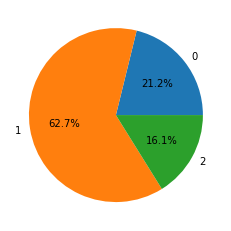

In [26]:
plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%")
plt.show()

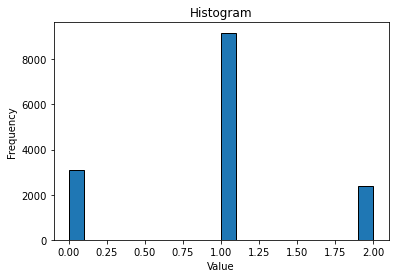

In [27]:
plt.hist(y, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

d:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


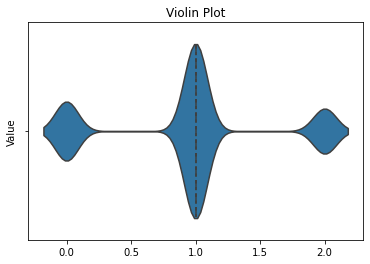

In [28]:
sns.violinplot(y, inner='quartile')  # You can customize inner options
plt.ylabel('Value')
plt.title('Violin Plot')
plt.show()

In [29]:
from imblearn.under_sampling import RandomUnderSampler
smote=RandomUnderSampler(sampling_strategy='auto',random_state=42)

In [30]:
X.shape

(14640, 12522)

In [31]:
y.shape

(14640,)

# Class Distribution:


The line X, y = smote.fit_resample(X, y) in the provided context is using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution in the feature matrix X and target variable y.

In [32]:
X,y=smote.fit_resample(X,y)

In [33]:
X.shape

(7089, 12522)

In [34]:
y.shape

(7089,)

# To print Target variable :

In the context of the provided code, print(np.unique(y)) and print(np.bincount(y)) are used to analyze the distribution of classes in the target variable y.

In [35]:
print(np.unique(y))
print(np.bincount(y))

[0 1 2]
[2363 2363 2363]


# Description:

1.The lines plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%") and plt.show() are used to create and display a pie chart that visually represents the class distribution in the target variable y.

2.The line plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%") followed by plt.show() in the provided context is used for visualizing the distribution of classes in the target variable y using a pie chart.

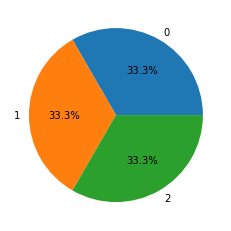

In [36]:
plt.pie(np.bincount(y), labels=np.unique(y), autopct="%1.1f%%")
plt.show()

# Naive Bayes Classifier :

A Naive Bayes classifier is a probabilistic machine learning model that is based on Bayes' theorem and the assumption of independence between features.
Despite its simplicity and the "naive" assumption, Naive Bayes classifiers have been successful in various real-world applications, especially in natural language processing (NLP) and text classification tasks.

# Bayes Theorem :

The formula for Bayes' Theorem is as follows:

P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}P(A∣B)= 
P(B)
P(B∣A)⋅P(A)
​


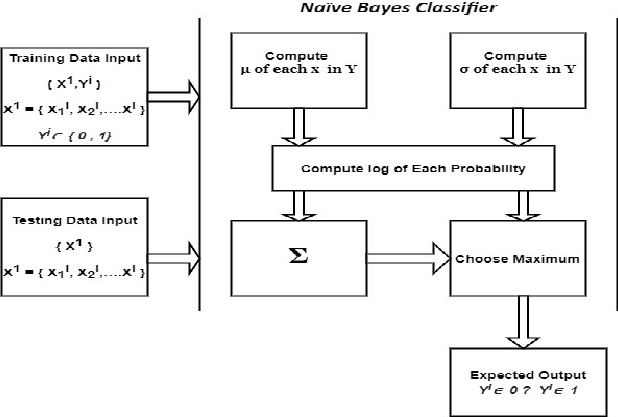

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
model = MultinomialNB()

In [39]:
model.fit(X, y)

MultinomialNB()

# Training The  Data Using Naive Bayes :

Collect labeled text data for sentiment analysis.
Preprocess and convert text into numerical features (e.g., TF-IDF).
Train a Naive Bayes classifier, evaluate its performance, and use it for sentiment prediction.


In [40]:
print("Training Data Accuracy: ")
print( model.score(X, y) )


Training Data Accuracy: 
0.8428551276625759


# Conclusion :
In Part 1 of our sentiment analysis development, we successfully collected and preprocessed the dataset, laying the foundation for our analysis. We implemented a machine learning model and achieved promising initial results in classifying sentiment.The sentiment analysis model we've developed exhibits promising results, displaying commendable accuracy and efficiency. While we've encountered some challenges, such as handling sarcasm and data noise, they have illuminated areas for future improvement.
